<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터를 사용에 알맞게 가공하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1_5=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_19.12_20.056.csv',encoding='cp949')
df_6=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.06.csv',encoding='cp949')
df_7=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.07.csv',encoding='cp949')
df_8=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.08.csv',encoding='cp949')
df_9=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.09.csv',encoding='cp949')
df_10=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.10.csv',encoding='cp949')
df_11=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.11.csv',encoding='cp949')
df_12=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.12.csv',encoding='cp949')

In [3]:
#concat이 error나서 append로 데이터 병합시킴
df=df1_5.append(df_6)
df=df.append(df_7)
df=df.append(df_8)
df=df.append(df_9)
df=df.append(df_10)
df=df.append(df_11)
df=df.append(df_12)

In [4]:
df1_5.shape[0]+df_6.shape[0]+df_7.shape[0]+df_8.shape[0]+df_9.shape[0]+df_10.shape[0]+df_11.shape[0]+df_12.shape[0]

19802991

In [5]:
df.shape
#shape이 맞는 걸 보니 잘 병합 되어 보인다.

(19802991, 12)

In [6]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.0,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.0,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.0,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.0,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.0,5


In [7]:
#대여일자 to_datetime으로 바꿔서 넣어주기 strftime
from datetime import datetime

df['대여일자']=pd.to_datetime(df['대여일자'])

In [8]:
df['year']=df['대여일자'].dt.year
df['month']=df['대여일자'].dt.month
df['day']=df['대여일자'].dt.day

In [9]:
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,year,month,day
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.00,17,2019,12,1
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.00,45,2019,12,1
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.00,12,2019,12,1
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.00,17,2019,12,1
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.00,5,2019,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066896,2020-12-31,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13,2020,12,31
1066897,2020-12-31,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52,2020,12,31
1066898,2020-12-31,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4,2020,12,31
1066899,2020-12-31,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7,2020,12,31


In [10]:
#2019년 데이터 지우기
df=df[df.year!=2019]

In [11]:
#rename columns
df= df.rename(columns={'대여일자':'date','대여시간':'time','대여소번호':'stno','대여소명':'stname','대여구분코드':'code','성별':'sex','연령대코드':'age','이용건수':'borrowednum',
                       '운동량':'exercise','탄소량':'co','이동거리':'dist','사용시간':'usedtime'})

In [14]:
df.drop('date',axis=1, inplace=True)

In [13]:
df.isna().sum()
#sex는 이따 drop 시킬 것

date                 0
time                 0
stno                 0
stname               0
code                 0
sex            9495988
age                  0
borrowednum          0
exercise             0
co                   0
dist                 0
usedtime             0
year                 0
month                0
day                  0
dtype: int64

In [15]:
df

,time,stno,stname,code,sex,age,borrowednum,exercise,co,dist,usedtime,year,month,day
776956,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.30,1280.00,6,2020,1,1
776957,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.00,6,2020,1,1
776958,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.50,2150.00,12,2020,1,1
776959,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.00,25,2020,1,1
776960,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.00,5,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066896,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13,2020,12,31
1066897,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52,2020,12,31
1066898,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4,2020,12,31
1066899,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7,2020,12,31


#기본적인 EDA 

1. 대여시간 별 이용건수 확인

In [35]:
grouped_time= df['borrowednum'].groupby(df['time'])

In [38]:
grouped_time=pd.DataFrame(grouped_time.sum())

In [41]:
grouped_time

,borrowednum
time,
0,650154
1,496729
2,340484
3,232836
4,158305
5,165324
6,319027
7,761183
8,1244230


In [65]:
grouped_time.sort_values(by=['borrowednum'])
min5=grouped_time.sort_values(by=['borrowednum']).iloc[0:5]
max5=grouped_time.sort_values(by=['borrowednum']).iloc[-5:]

In [69]:
print(min5)
print('-------------')
print(max5)

      borrowednum
time             
4          158305
5          165324
3          232836
6          319027
2          340484
-------------
      borrowednum
time             
20        1479813
16        1489441
19        1671193
17        1907089
18        2223821


Text(0, 0.5, 'borrowed number')

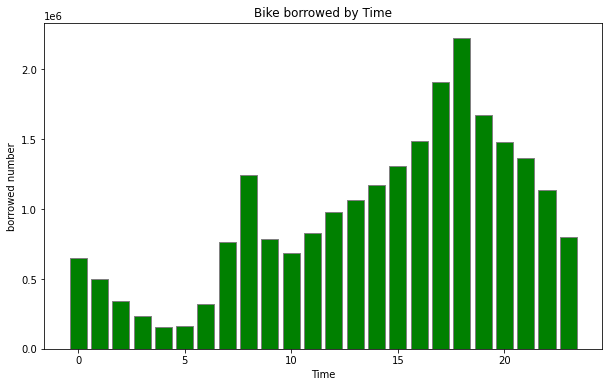

In [50]:
plt.figure(figsize=(10,6))
plt.bar(grouped_time.index, grouped_time.borrowednum,color='green',edgecolor='gray')
plt.title('Bike borrowed by Time')
plt.xlabel('Time')
plt.ylabel('borrowed number')
#제일 이용건수가 적은 시간대는 새벽2시~새벽6시
#제일 이용 건수가 많은 시간대는 오후4시~ 오후 8시
#8시 또한 출근 시간대라 그런지 주변 시간대에 비해서 이용률이 높다.

2. 나이대 분석
age 별로 이용건수를 확인해보려고 한다.

In [74]:
#age별 이용건수 group
grouped_age= df['borrowednum'].groupby(df['age'])
grouped_age=pd.DataFrame(grouped_age.sum())

In [86]:
grouped_age

,borrowednum
age,
20대,10684995
30대,5335555
40대,3372008
50대,1928582
60대,491492
70대~,87287
~10대,1371828


Text(0.5, 1.0, 'borrowed by age')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


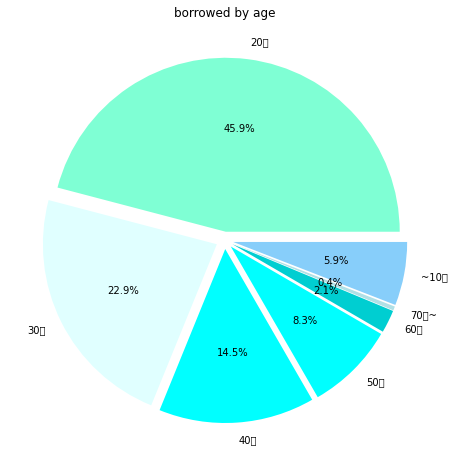

In [91]:
plt.figure(figsize=(8,8))
grouped_age
explode = [0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05]
colors=['aquamarine','lightcyan','aqua','cyan','darkturquoise','powderblue','lightskyblue']
plt.pie(grouped_age.borrowednum,labels=grouped_age.index,explode=explode, autopct='%1.1f%%',colors=colors)
plt.title('borrowed by age')
#20대가 가장 많이 이용 하는 것으로 보임

#따릉이 대여소 정보 
데이터와 merge 시켜서 어느 구에서 가장 많이 빌려가는지 궁금

In [95]:
station= pd.read_csv('/content/drive/MyDrive/따릉이 project/공공자전거 대여소 정보(21.01.31 기준).csv',encoding='cp949',skiprows=5, header=None)

In [97]:
#컬럼 명 지정해주기
station= station.rename(columns= {0: 'stno', 1: 'stname',2: 'place',3:'detailedplace',4:'Lat',5:'Long',6:'Time',7:'LCD',8:'QR',9:'method'})

In [99]:
station.head()

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
#data merge 하고 folium으로 어느 구에 따릉이 거치소 가장 많이 있는지
#어느 구에서 사용량이 가장 높은지
#거치소 대비 사용량을 알아보고자 한다.